# SNA to find twitter influencers

The focus of this project is to find out who are the KOLs in the Data Science community. 

Steps:

- Harvest Tweets using Search API (TweetRead.py), store tweets in a json file
- Remove any tweets that do not have a retweet, find the authors of the remaining tweets
- Find who these authors are following (GetFriends.py), store the list of user pairs in a txt file
- Contruct a graph from the user list
- Apply basic network analysis
- Use betweeness centrality to find influencers

## Importing Modules

In [1]:
#Import modules
%matplotlib inline

#handling data
import pandas as pd
import numpy as np
from scipy import stats
from operator import itemgetter

#handling information
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

# handling warnings
import warnings
warnings.filterwarnings('ignore')

# other handy packages
import operator
import itertools

## Loading the data

In [2]:
# read in the userlist
df = pd.read_csv('userList.txt',sep=' ',header=None)
df.columns = ['sender','target']

In [3]:
df.head()

,sender,target
0,Islam35613341,jessfraz
1,Islam35613341,catoutofcontxt
2,Islam35613341,CommitStrip
3,Islam35613341,alissaknight
4,Islam35613341,BozjanT


In [4]:
df.shape

(1152, 2)

There are 1152 pairs of users and friends in the dataset.

##  Creating the graph

In [7]:
graph=nx.from_pandas_edgelist(df, 
                               source = 'sender', 
                               target = 'target')

In [8]:
degrees = [val for (node, val) in graph.degree()]

## Basic analysis: degree distribution

In [9]:
print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")

The maximum degree of the Graph is 22
The minimum degree of the Graph is 1


In [10]:
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")

The average degree of the nodes in the Graph is 1.9
The most frequent degree of the nodes found in the Graph is 1


(0.8567988323372042, 200)

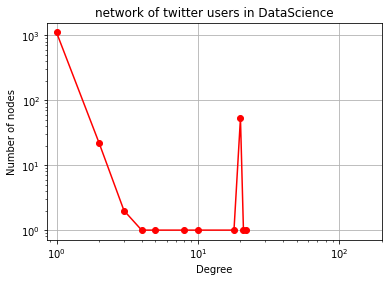

In [212]:
# ploting the degree distribution
values = sorted(set(degrees))
hist = [degrees.count(x) for x in values]

plt.figure()
plt.grid(True)
plt.loglog(values, hist, 'ro-')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of twitter users in DataScience')
plt.xlim([0, 2*10**2])

## Basic analysis: clustering coefficient

In [213]:
# calculating clustering coefficient

# Clustering coefficient of all nodes
clust_coefficients = nx.clustering(graph)

# Average clustering coefficient
nx.average_clustering(graph)

0.0

The average clustering coefficient indicates low density.

## Giant Component

In [11]:
# check how many connected components are in the graph
nx.number_connected_components(graph)

44

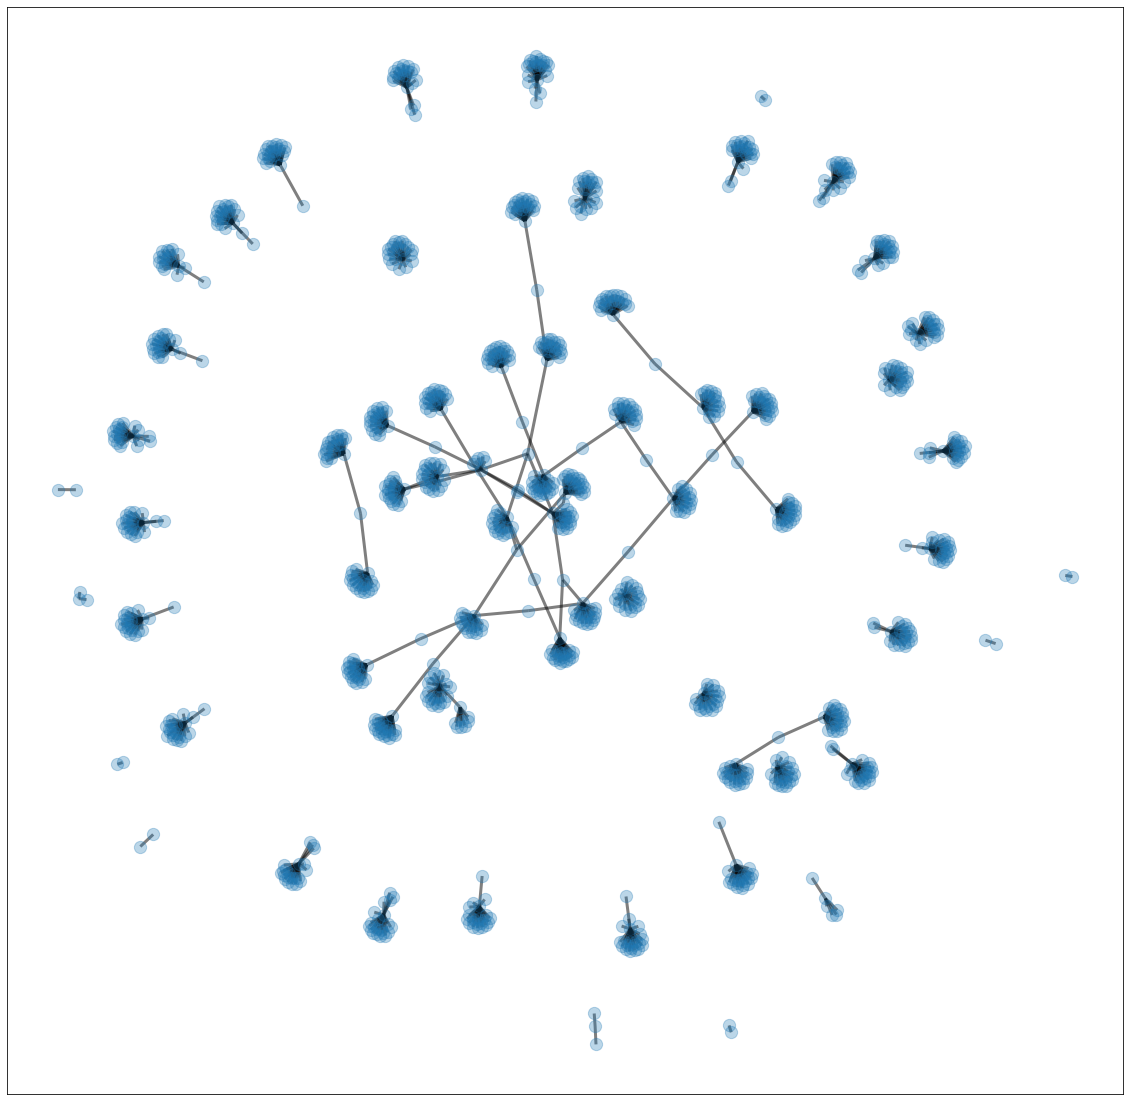

In [215]:
# ploting the graph
plt.figure(figsize = (20,20))

pos=nx.spring_layout(graph) # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos,
                       with_labels=False,
                       node_size = 150,
                       alpha = 0.3)
# edges
nx.draw_networkx_edges(graph, pos,
                       width=3.0,
                       alpha=0.5)

From the graph above, we can see there is a giant component in the middle.

In [12]:
# find the largest subgraph
small_components = sorted(nx.connected_components(graph), key=len)[:-1]
graph.remove_nodes_from(itertools.chain.from_iterable(small_components))

In [13]:
# check if there is only one connected component left in the graph
nx.number_connected_components(graph)

1

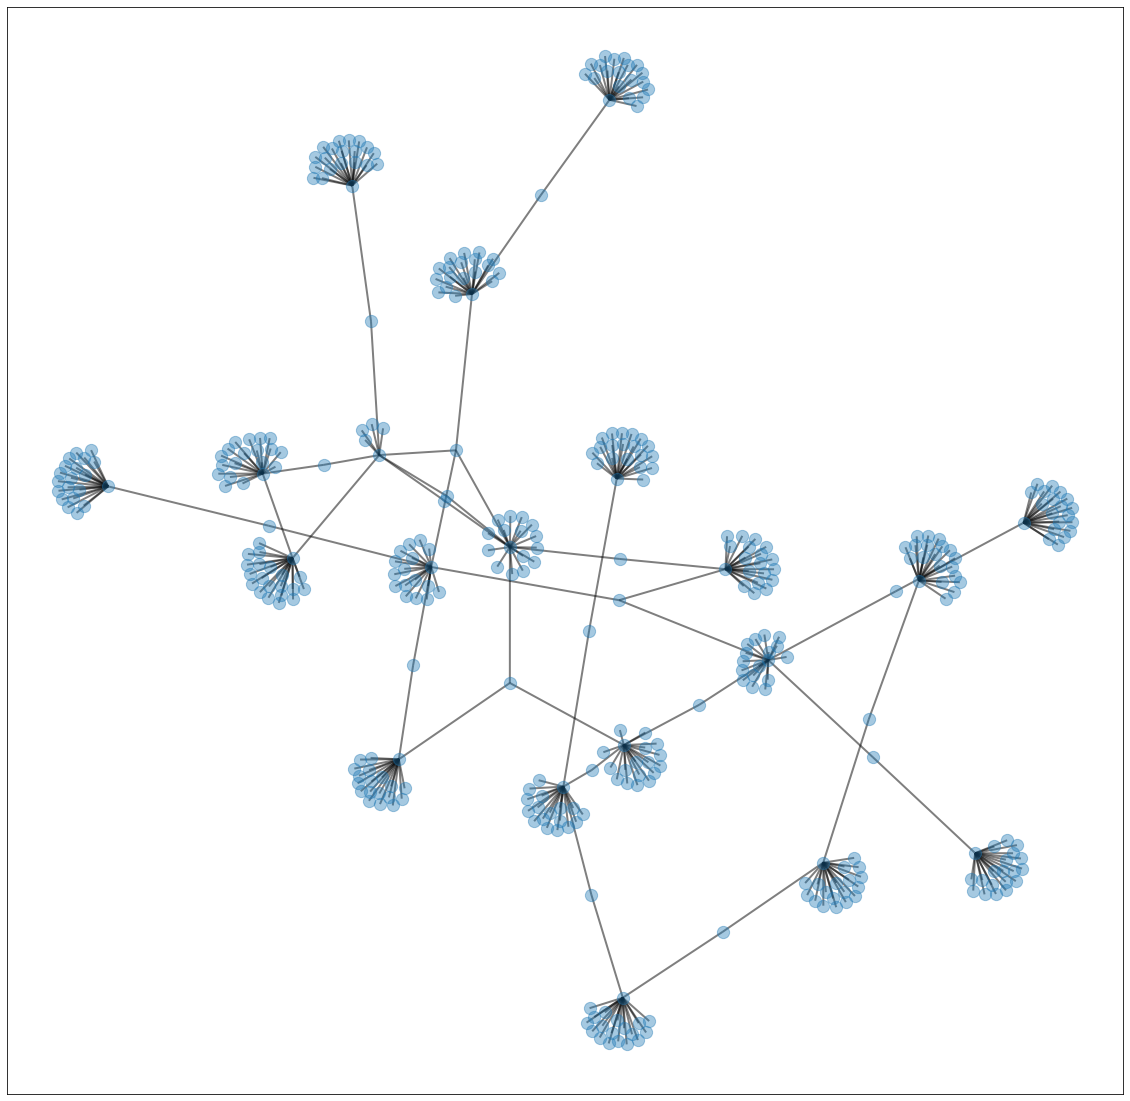

In [218]:
# ploting only the largest subgraph
plt.figure(figsize = (20,20))

pos=nx.spring_layout(graph) # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos,
                       with_labels=False,
                       node_size = 150,
                       alpha = 0.4)
# edges
nx.draw_networkx_edges(graph, pos,
                       width=2.0,
                       alpha=0.5)

The average degree of the nodes in the Graph is 2.0
The most frequent degree of the nodes found in the Graph is 1


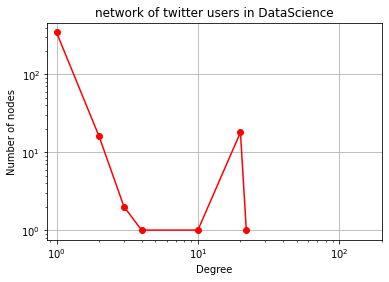

In [219]:
# ploting the degree distribution again for the largest component
degrees = [val for (node, val) in graph.degree()]
values = sorted(set(degrees))
hist = [degrees.count(x) for x in values]

plt.figure()
plt.grid(True)
plt.loglog(values, hist, 'ro-')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of twitter users in DataScience')
plt.xlim([0, 2*10**2])

print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")

In [220]:
# Average clustering coefficient
nx.average_clustering(graph)

0.0

The average clustering coefficient indicates we might not be able to find a closely connected community in the graph.

## Network influencers

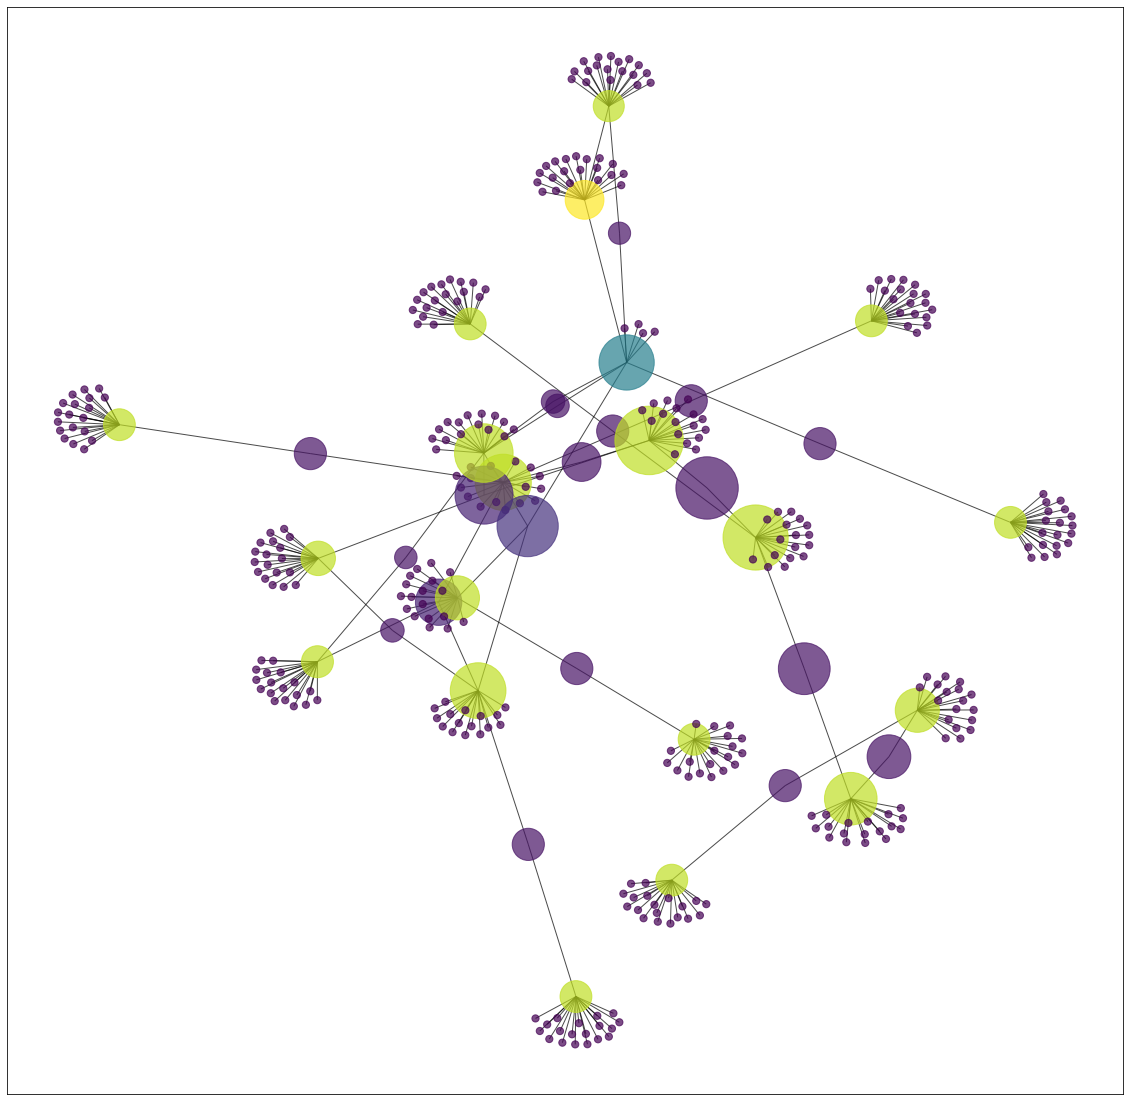

In [221]:
#  visualize the network such that the node color varies with Degree and node size with Betweenness Centrality

pos = nx.spring_layout(graph)

betCent = nx.betweenness_centrality(graph, normalized=True, endpoints=True)

node_color = [20000.0 * graph.degree(v) for v in graph]

node_size =  [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))

nx.draw_networkx(graph, pos=pos, with_labels=False,
                 node_color=node_color,
                 alpha = 0.7,
                 node_size=node_size)
#plt.axis('off')

In [222]:
# finding the label of top influencers
top_n_influencers = 7
for index, node in enumerate(sorted(betCent, key=betCent.get, reverse=True)[:top_n_influencers]):
    print(index, node)

0 BlkHwk0ps
1 TheDigitalJob
2 skiingmadman
3 TensorFlow
4 jrivascasanova
5 YourAnonNews
6 Tech_Footprints


{'Tech_Footprints': Text(-0.14819822091090767, 0.12890244265226788, 'Tech_Footprints'),
 'YourAnonNews': Text(-0.17808131760070206, 0.10319442339600987, 'YourAnonNews'),
 'TheDigitalJob': Text(0.2450957709293474, 0.018022581197012562, 'TheDigitalJob'),
 'skiingmadman': Text(0.1694503301925396, 0.11752460278279796, 'skiingmadman'),
 'jrivascasanova': Text(-0.17841785856635192, 0.18767354417163315, 'jrivascasanova'),
 'TensorFlow': Text(-0.11016131793956986, 0.04102224373025261, 'TensorFlow'),
 'BlkHwk0ps': Text(0.07916802380581706, 0.21300300350222343, 'BlkHwk0ps')}

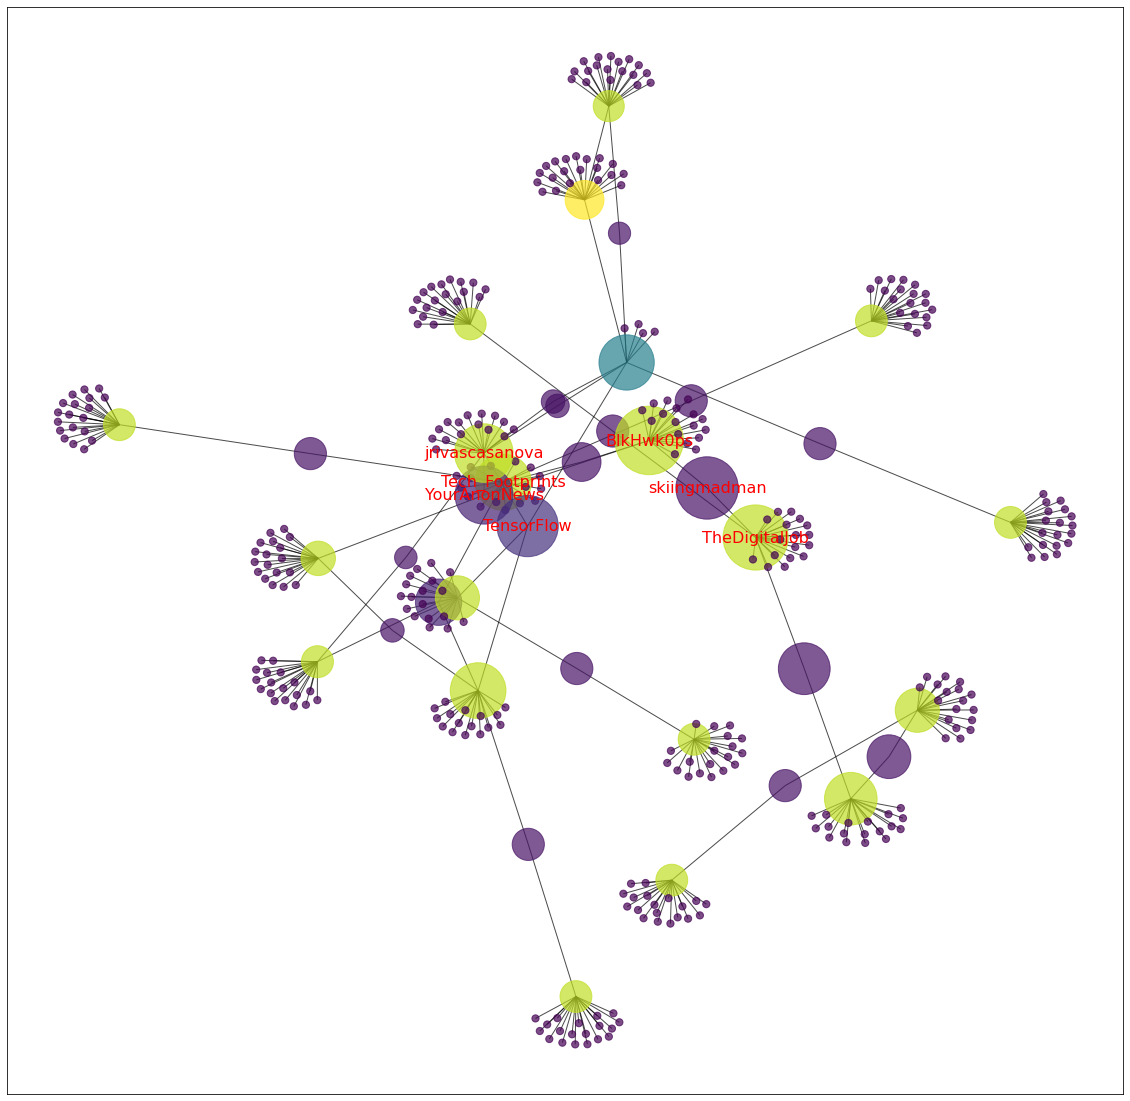

In [224]:
# label the nodes with high betweenness centrality

high_betCent_list = sorted(betCent, key=betCent.get, reverse=True)[:top_n_influencers]

plt.figure(figsize=(20,20))

nx.draw_networkx(graph, pos=pos, with_labels=False,
                 node_color=node_color,
                 alpha = 0.7,
                 node_size=node_size)
labels={}
for node in graph.nodes():
    if node in high_betCent_list:
        # set labels for nodes with high betweenness centrality
        labels[node] = node

nx.draw_networkx_labels(graph, pos, labels,font_size=16,font_color='r')

In [225]:
# creating a dataframe that lists five node labels with the highest centrality measures
centrality_matrix = pd.DataFrame()

degCent = nx.degree_centrality(graph)

centrality_matrix['Degree Centrality'] = sorted(degCent, key=degCent.get, reverse=True)
centrality_matrix['Betweenness Centrality'] = sorted(betCent, key=betCent.get, reverse=True)

In [226]:
centrality_matrix.head(5)

,Degree Centrality,Betweenness Centrality
0,KirkDBorne,BlkHwk0ps
1,Islam35613341,TheDigitalJob
2,rustenburg_J,skiingmadman
3,archie_jackson,TensorFlow
4,Tech_Footprints,jrivascasanova


## Use directed network instead of undirected network

In [227]:
# initialize a directed graph
dg = nx.DiGraph()

# populate the graph
for index, row in df.iterrows():
    sender = row['sender']
    target = row['target']
    dg.add_edge(sender,target)

## Basic analysis: in/out-degree distribution

In [228]:
# Calculate in degrees of the directed graph
in_degrees = [val for (node, val) in dg.in_degree()]
in_values = sorted(set(in_degrees))
in_hist = [in_degrees.count(x) for x in in_values]

# Calculate out degrees of the directed graph
out_degrees = [val for (node, val) in dg.out_degree()]
out_values = sorted(set(out_degrees))
out_hist = [out_degrees.count(x) for x in out_values]

(0.8608916593317348, 100)

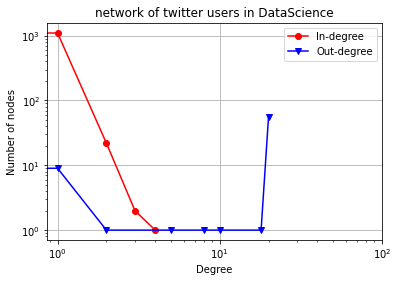

In [229]:
#  use matplotlib to plot the degree distribution
plt.figure() 
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('network of twitter users in DataScience')
plt.xlim([0, 10**2])

The number of out-degree does not decrease as the degree increases. This is due to the way I collected the user data.

In [241]:
# finding the nodes with highest in-degree
for label, in_degree in sorted(dg.in_degree(), key=operator.itemgetter(1), reverse = True)[:5]:
    print(label, in_degree)

TensorFlow 4
github 3
YourAnonNews 3
kaggle 2
tweetketan 2


Those who tweet about "DataScience" are following these accounts.